In [1]:
import os
import numpy as np
import glob
import scipy.io as scio

In [2]:
data_path1 = '../data/ninapro/db1/s1/S1_A1_E1.mat'
data_path2 = '../data/ninapro/db1/s1/S1_A1_E2.mat'
data_path3 = '../data/ninapro/db1/s1/S1_A1_E3.mat'
EMGData1 = scio.loadmat(data_path1)
EMGData2 = scio.loadmat(data_path2)
EMGData3 = scio.loadmat(data_path3)
print(EMGData1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])


In [3]:
emg1 = EMGData1['emg']
restimulus1 = EMGData1['restimulus']
rerepetition1 = EMGData1['rerepetition']
emg2 = EMGData2['emg']
restimulus2 = EMGData2['restimulus']
restimulus2 = restimulus2 + restimulus1.max() * (restimulus2>0).astype('int')
rerepetition2 = EMGData2['rerepetition']
emg3 = EMGData3['emg']
restimulus3 = EMGData3['restimulus']
restimulus3 = restimulus3 + restimulus2.max() * (restimulus3>0).astype('int')
rerepetition3 = EMGData3['rerepetition']
print(emg1.shape, emg2.shape, emg3.shape)
print(restimulus1.shape, restimulus2.shape, restimulus3.shape)
print(rerepetition1.shape, rerepetition2.shape, rerepetition3.shape)
emg = np.vstack([emg1,emg2,emg3])
restimulus = np.vstack([restimulus1,restimulus2,restimulus3])
rerepetition = np.vstack([rerepetition1,rerepetition2,rerepetition3])
print(emg.shape)
print(restimulus.shape)
print(rerepetition.shape)

(101014, 10) (142976, 10) (227493, 10)
(101014, 1) (142976, 1) (227493, 1)
(101014, 1) (142976, 1) (227493, 1)
(471483, 10)
(471483, 1)
(471483, 1)


In [4]:
print(EMGData1['restimulus'].min(), EMGData1['restimulus'].max(), 
EMGData2['restimulus'].min(),EMGData2['restimulus'].max(), 
EMGData3['restimulus'].min(),EMGData3['restimulus'].max())


0 12 0 17 0 23


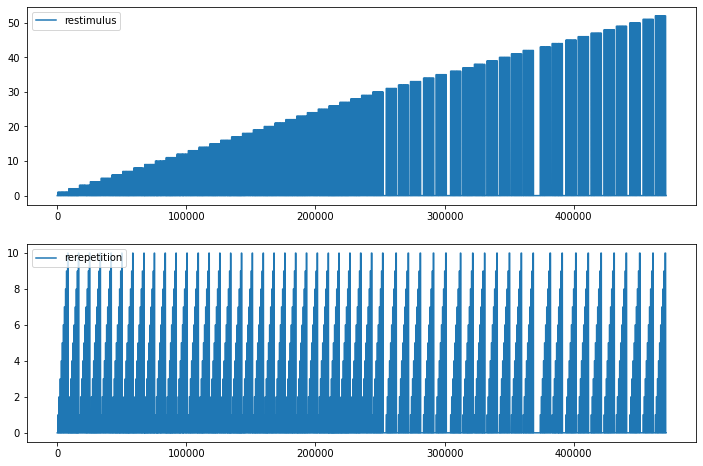

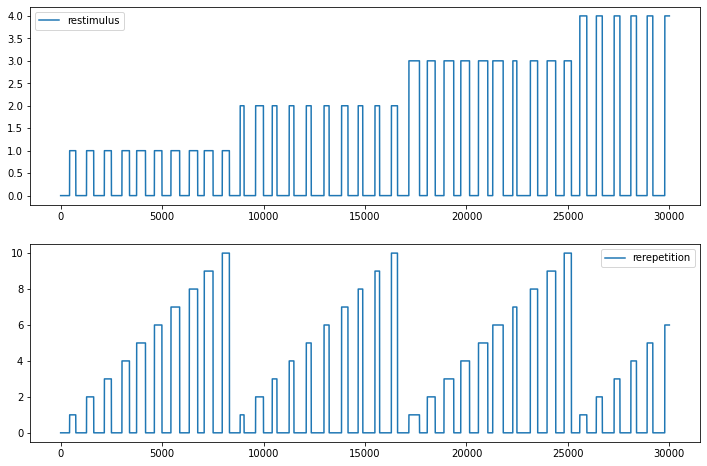

In [5]:
import matplotlib.pyplot as plt
from scipy.signal import resample
plt.figure(figsize=(12,8))
plt.subplot(211)
sample_dots = len(restimulus)
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices, restimulus)
plt.legend(['restimulus'])
plt.subplot(212)
sample_dots = len(rerepetition)
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices, rerepetition)
plt.legend(['rerepetition'])
plt.show()


sub_length = 30000
plt.figure(figsize=(12,8))
plt.subplot(211)
sample_dots = len(restimulus)
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices[0:sub_length], restimulus[0:sub_length])
plt.legend(['restimulus'])
plt.subplot(212)
sample_dots = len(rerepetition)
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices[0:sub_length], rerepetition[0:sub_length])
plt.legend(['rerepetition'])
plt.show()